<a href="https://colab.research.google.com/github/ChoeTaeBin/deep_learning_study/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch

In [5]:
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

데이터 확장  
transform 만들기

In [6]:
import torchvision.transforms as transforms

affine = transforms.RandomAffine((-30, 30), scale = (0.8, 1.2))#회전(-30 ~ 30), 크기 조절(0.8 ~ 1.2)
flip = transforms.RandomHorizontalFlip(p=0.5) #좌우 반전
normalize = transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)) #평균은 0~1
to_tensor = transforms.ToTensor()
erase = transforms.RandomErasing(p=0.5) #무작위로 구멍을 냄

In [7]:
transform_train = transforms.Compose([affine, flip, to_tensor, normalize, erase])
transform_test = transforms.Compose([to_tensor, normalize])

데이터 가져오기, 확장 시키기

In [8]:
cifar10_train = CIFAR10("./data", train=True, download = True, transform = transform_train) #가져오면서 바로 변형 시키는 것
cifar10_test = CIFAR10("./data", train=False, download = True, transform = transform_test)

100%|██████████| 170498071/170498071 [00:12<00:00, 13541196.72it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


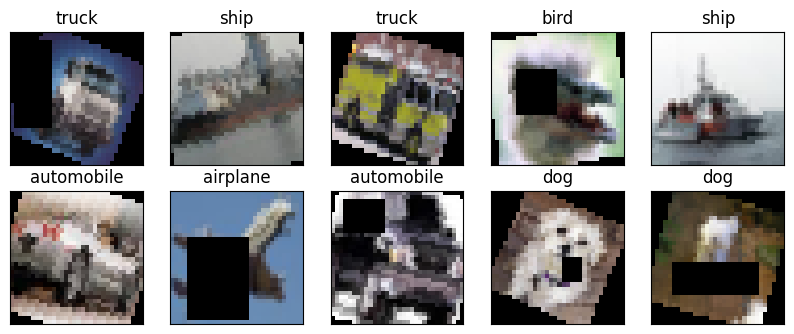

In [9]:
#가져온 데이터를 살펴보기 위한 셀임
import matplotlib.pyplot as plt

temp_loader = DataLoader(cifar10_train, batch_size = 25, shuffle = True)

dataiter = iter(temp_loader)
images, labels = next(dataiter) #25개 가져옴

plt.figure(figsize = (10, 10))
for i in range(10):
  ax = plt.subplot(5, 5, i+1)
  ax.imshow(images[i].permute(1, 2, 0)) #차원 순서를 바꾸어 주는 것 matplotlib과 pytorch tensor의 이미지 차원 구성 방식이 다르기 때문
  label = cifar10_classes[labels[i]]
  ax.set_title(label)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


이렇게 데이터를 변형시켜서 가져온 것을 볼 수 있다.

In [10]:
images.shape

torch.Size([25, 3, 32, 32])

(batch_size, channel, height, width)

Tensor.permute(순서)   
차원 순서 바꾸기 연산

In [11]:
images[3]

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.6078, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.6471, 0.0000, 0.0000],
         [0.9098, 0.9255, 0.9255,  ..., 0.7020, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.6118,  ..., 0.6118, 0.5725, 0.5569],
         [0.0000, 0.0000, 0.6863,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.7765,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.8118, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.8353, 0.0000, 0.0000],
         [0.9373, 0.9529, 0.9490,  ..., 0.8588, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.6941,  ..., 0.7569, 0.7333, 0.7137],
         [0.0000, 0.0000, 0.7412,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.7961,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.5412, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.5804, 0.0000, 0.0000],
         [0.9020, 0.8980, 0.8902,  ..., 0.6471, 0.0000, 0.

In [12]:
images[3].shape

torch.Size([3, 32, 32])

In [13]:
permuted_image = images[3].permute(1, 2, 0)
permuted_image

tensor([[[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         ...,
         [0.6078, 0.8118, 0.5412],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         ...,
         [0.6471, 0.8353, 0.5804],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.9098, 0.9373, 0.9020],
         [0.9255, 0.9529, 0.8980],
         [0.9255, 0.9490, 0.8902],
         ...,
         [0.7020, 0.8588, 0.6471],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        ...,

        [[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.6118, 0.6941, 0.7020],
         ...,
         [0.6118, 0.7569, 0.6157],
         [0.5725, 0.7333, 0.5647],
         [0.5569, 0.7137, 0.5569]],

        [[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.

In [14]:
permuted_image.shape

torch.Size([32, 32, 3])

DataLoader만들기

In [15]:
batch_size = 64
train_loader = DataLoader(cifar10_train, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(cifar10_test, batch_size = batch_size, shuffle = False)

모델 만들기

In [16]:
import torch.nn as nn

#(batch_size, 3, 32, 32) 가 들어 올 것 이때 batch_size를 떼고 생각 해도 됨 즉, (3, 32, 32)로 따져보자
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.relu = nn.ReLU()
    self.conv1 = nn.Conv2d(3, 8, 5) #(입력 채널 수, 필터 수, 필터 크기)
    #(8, 28, 28)
    self.pool = nn.MaxPool2d(2,2) #(영역 크기, stride)
    #(8, 14, 14)
    self.conv2 = nn.Conv2d(8, 16, 5)
    #(16, 10, 10) -> pooling을 한번 더 -> (16, 5, 5)
    self.fc1 = nn.Linear(16*5*5, 256) #전 결합 층, input크기는 따져봐야 알 수 있음
    self.dropout = nn.Dropout(p=0.5) #절반을 끔
    self.fc2 = nn.Linear(256, 10) #class가 10개 이므로

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.pool(x)
    x = self.relu(self.conv2(x))
    x = self.pool(x)
    x = x.view(-1, 16*5*5) #편다
    x = self.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x

In [17]:
net = Net()
net.cuda()
print(net)

Net(
  (relu): ReLU()
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


optimizer, loss function 생성

In [18]:
from torch import optim

loss_fnc = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

훈련

In [19]:
record_loss_train = []
record_loss_test = []

num_epochs = 20

for i in range(num_epochs):
  net.train()
  loss_train = 0

  for j, (x,t) in enumerate(train_loader):
    x,t = x.cuda(), t.cuda()
    y = net(x)
    loss = loss_fnc(y, t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_train += loss.item()
  loss_train /= j+1

  record_loss_train.append(loss_train)

  net.eval()
  loss_test = 0

  for j, (x,t) in enumerate(test_loader):
    x,t = x.cuda(), t.cuda()
    y = net(x)
    loss = loss_fnc(y, t)
    loss_test += loss.item()
  loss_test /= j+1

  record_loss_test.append(loss_test)

  if i%1 == 0:
    print(f"Epoch:{i}, Loss_Train:{loss_train}, Loss_Test{loss_test}")

Epoch:0, Loss_Train:1.9420286750854434, Loss_Test1.612551970846334
Epoch:1, Loss_Train:1.7408417772758953, Loss_Test1.5158454437924038
Epoch:2, Loss_Train:1.6664000269397141, Loss_Test1.4499801701041544
Epoch:3, Loss_Train:1.6142795259690346, Loss_Test1.4086225055585242
Epoch:4, Loss_Train:1.5777082761840138, Loss_Test1.350935983050401
Epoch:5, Loss_Train:1.5553801553633513, Loss_Test1.3268894086218184
Epoch:6, Loss_Train:1.5338516383219862, Loss_Test1.303842598845245
Epoch:7, Loss_Train:1.5192447600462247, Loss_Test1.2811943603928682
Epoch:8, Loss_Train:1.5041245340996081, Loss_Test1.2625828047466885
Epoch:9, Loss_Train:1.4939038689484072, Loss_Test1.3284486152563886
Epoch:10, Loss_Train:1.4810406872073707, Loss_Test1.2752390097660624
Epoch:11, Loss_Train:1.4721429677265685, Loss_Test1.232665798087029
Epoch:12, Loss_Train:1.464099914673954, Loss_Test1.2222016601805474
Epoch:13, Loss_Train:1.4593386124162113, Loss_Test1.2353130772614935
Epoch:14, Loss_Train:1.4473496980374427, Loss_Tes

오차 추이

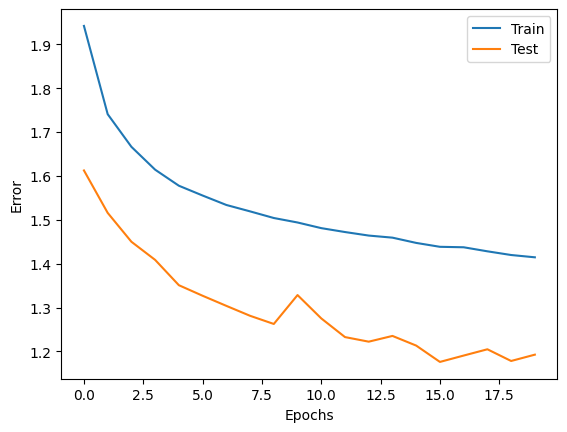

In [20]:
plt.plot(range(len(record_loss_train)), record_loss_train, label = "Train")
plt.plot(range(len(record_loss_test)),record_loss_test, label = "Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

정답률 계산

In [21]:
correct = 0
total = 0
net.eval() #평가모드

for i, (x,t) in enumerate(test_loader):
  x, t = x.cuda(), t.cuda()
  y = net(x)
  correct += (y.argmax(axis = 1) == t).sum().item()
  total += len(x)

print(f"accuracy:{(correct/total)*100}%")

accuracy:57.21000000000001%


모델을 사용해서 예측

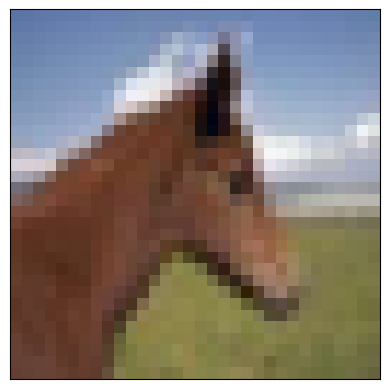

정답:horse, 예측결과:horse


In [24]:
temp = DataLoader(cifar10_test, batch_size = 1, shuffle = True)
dataiter = iter(temp)
images, labels = next(dataiter)

plt.imshow(images[0].permute(1,2,0))
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()

net.eval()
x,t = images.cuda(), labels.cuda()
y = net(x)

print(f"정답:{cifar10_classes[labels[0]]}, 예측결과:{cifar10_classes[y.argmax().item()]}")
